<a href="https://colab.research.google.com/github/pjjongho/Colab_AD/blob/main/Online-payment-fraud-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Chapter 05]**  
**┗ 온라인 결제 사기거래 탐지**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「Feature 상관관계 분석」
* 🥇Session 3 - 「이상 탐지 모델링」

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/00.Fast_campus/02.Anomaly_detection/03.Part3/Chapter05'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 💰

```
A사는 요즘 핫한 중고거래 플랫폼(사이트)를 운영하는 회사다. 최근 플랫폼 내 페이 시스템을 오픈하고, 페이 시스템을 기반으로 서비스를 확장해 나가고 있다.  
중거거래 특성상 빈번하게 사기거래가 발생하게 되는데, 최근 사기거래 건수가 급증하고 있어 소비자 피해가 문제되고 있다. 이를 방지하기 위해서 페이 시스템을  
통해 수집된 데이터를 기반으로 이상 거래를 사전 탐지하고 방어 활동들을 전개하나가고자 한다.

```  

> **데이터 살펴보기**

* 온라인 거래 데이터
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|step|1step이 1시간인 시간 단위|
|type|온라인 거래유형|
|amount|거래 금액|
|nameOrig|거래 시작 고객|
|oldbalanceOrg|거래 전 잔액|
|newbalanceOrig|거래 후 잔액|
|nameDest|거래 수신 고객|
|oldbalanceDest|거래 전 수취인의 초기 잔액|
|newbalanceDest|거래 후 받는 사람의 새 잔액|
|isFraud|사기 거래|



In [ ]:
# ▶ pd.set option
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv("chapter05_df.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 중고 플랫폼 온라인 거래 사기 거래 건수 증가
▶ 소비자 피해 및 사용자 감소
```  

> **기대효과**

```
▶ 사기거래 사전 차단으로 소비자 피해 방지
▶ 신규 회원 증가
```

> **해결방안**

```
▶ 사기거래 이상탐지 모델링을 통한 사기거래 사전 차단
▶ Session 1 🥉
 - Data 전처리 및 EDA
▶ Session 2 🥈
 - Feature 상관관계 분석
▶ Session 3 🥇
 - 이상 탐지 모델링 수행
```

> **성과측정**  

```
▶ 모델 활용 전/후 사기거래 건수 비교
▶ 모델 활용 전/후 사기거래 소비자 피해 금액 비교
```

> **현업적용**  

```
▶ 온라인 거래 발생 시 거래 데이터 Model Input
▶ 이상 거래 확인 시 해당 거래 상세 분석 후 조치
```

> **주요 코드 미리 살펴보기**  

```
▶ Session 1 → list.append(), pd.concat()
▶ Session 2 → .value_counts(normalize = True), .groupby('type')['isFraud'].agg(['count', 'sum']), enumerate()
▶ Session 3 → .drop(), OneHotEncoder(), LogisticRegression()
```

## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [ ]:
# ▶ Data 형태 확인
# ▶ 6362620 row, 11 col로 구성됨
print('df :', df.shape)

df : (6362620, 11)


In [ ]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# ▶ Null 값 확인
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# ▶ Outlier 확인
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# ▶ Target Ratio 확인, 0.13%
df['isFraud'].value_counts(normalize = True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [ ]:
# ▶ 의미불분명 데이터 확인
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
# ▶ 숫자형, 범주형 변수 분할
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("categorical_list :", categorical_list)
print("numerical_list :", numerical_list)

categorical_list : ['type', 'nameOrig', 'nameDest']
numerical_list : ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
# ▶ 범주형 변수 유니크 값 출력, 'nameOrig'와 'nameDest' 고객 ID 이므로 변수로 활용하기 어려워 보임
list_of_df = []

for var in categorical_list :
  loop_df = pd.DataFrame({'var':[var], 'ncnt':[df[var].nunique()]})
  list_of_df.append(loop_df)

df_concat = pd.concat(list_of_df).reset_index(drop=True)
df_concat

,var,ncnt
0,type,5
1,nameOrig,6353307
2,nameDest,2722362


## **🥈Session 2**  
**┗ Feature 상관관계 분석**  
---


### · Categorical val & 'isFraud' 분석
---

In [ ]:
# ▶ 범주형 데이터 확인
categorical_list

['type', 'nameOrig', 'nameDest']

In [ ]:
df['isFraud'].value_counts(normalize = True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [ ]:
df['isFraud'].dtype

dtype('int64')

In [ ]:
# ▶ 'type' 별 Traget Ratio 확인
temp = df.groupby('type')['isFraud'].agg(['count', 'sum'])
temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
temp['lift'] = round(temp['ratio']/0.13,1)
temp

,count,sum,ratio,lift
type,,,,
CASH_IN,1399284,0,0.00,0.0
CASH_OUT,2237500,4116,0.18,1.4
DEBIT,41432,0,0.00,0.0
PAYMENT,2151495,0,0.00,0.0
TRANSFER,532909,4097,0.77,5.9


In [ ]:
# ▶ nameOrig, 여러번 사기의 포함된 거래(ID)가 있는지?
temp = df.groupby('nameOrig')['isFraud'].agg(['count', 'sum'])
temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
temp.sort_values(by=['ratio'], ascending =False)

,count,sum,ratio
nameOrig,,,
C1998644906,1,1,100.0
C2064336595,1,1,100.0
C239155420,1,1,100.0
C782313486,1,1,100.0
C2052061131,1,1,100.0
...,...,...,...
C164527924,1,0,0.0
C16452791,1,0,0.0
C164527901,1,0,0.0


In [ ]:
temp.sort_values(by=['count'], ascending =False)

,count,sum,ratio
nameOrig,,,
C1065307291,3,0,0.0
C1784010646,3,0,0.0
C1902386530,3,0,0.0
C1832548028,3,0,0.0
C545315117,3,0,0.0
...,...,...,...
C1645325210,1,0,0.0
C1645325020,1,0,0.0
C1645324530,1,0,0.0


In [ ]:
# ▶ nameDest, 여러번 사기의 포함된 거래(ID)가 있는지?
temp = df.groupby('nameDest')['isFraud'].agg(['count', 'sum'])
temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
#temp.sort_values(by=['ratio'], ascending =False).head(30)
temp.sort_values(by=['count', 'ratio'], ascending =False)

,count,sum,ratio
nameDest,,,
C1286084959,113,0,0.0
C985934102,109,0,0.0
C665576141,105,0,0.0
C2083562754,102,0,0.0
C1590550415,101,0,0.0
...,...,...,...
M999998692,1,0,0.0
M99999900,1,0,0.0
M999999089,1,0,0.0


### · numeric val & 'isFraud' 분석

In [ ]:
# ▶ 수치형 데이터 확인
numerical_list

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
# ▶ 수치형 데이터 확인
df[numerical_list].head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
# ▶ binning을 하기 위한 준비
df_num = df[numerical_list]
df_num_des = pd.DataFrame(df_num.describe())
df_num_des

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# ▶ Target 변수 Drop
num_list = df_num_des.columns[:-2]
num_list

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [ ]:
# ▶ 수치형 변수 단위따라 binning
import numpy as np

for i, col in enumerate(num_list) :
  bins = [df_num_des.loc['min'][i], df_num_des.loc['25%'][i], df_num_des.loc['75%'][i], np.inf]
  feature_nm = col +'_gp'
  df_num[feature_nm] = np.digitize(df_num[col], bins)

In [ ]:
# ▶ 기존 Col
df_num.columns[0:6]

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [ ]:
# ▶ 신규 Col
df_num.columns[8:]

Index(['step_gp', 'amount_gp', 'oldbalanceOrg_gp', 'newbalanceOrig_gp',
       'oldbalanceDest_gp', 'newbalanceDest_gp'],
      dtype='object')

In [ ]:
df['isFraud'].value_counts(normalize = True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [ ]:
# ▶ Lift 계산
list_of_df = []
Target_ratio = 0.13

for i in df_num.columns[0:6] :
  gp = i + '_gp'
  temp = df_num.groupby(gp)['isFraud'].agg(['count', 'sum'])
  temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
  temp['lift'] = round(temp['ratio'] / Target_ratio,2)
  temp_df = pd.DataFrame(temp)
  gap = temp_df['lift'].max() - temp_df['lift'].min()
  loop_df = pd.DataFrame([[i, gap]], columns=['val','gap'])
  list_of_df.append(loop_df)

df_accum_start = pd.concat(list_of_df)

In [ ]:
len(df_accum_start)

6

In [ ]:
# ▶ lift max-min Gap이 큰 데이터 부터 Sorting
df_accum_start.sort_values(by=['gap'], ascending =False).head(10)

,val,gap
0,oldbalanceOrg,2.77
0,amount,2.47
0,step,1.69
0,newbalanceOrig,1.23
0,oldbalanceDest,0.69
0,newbalanceDest,0.00


In [ ]:
# ▶ 확인
i = 'oldbalanceDest'
gp = i +"_gp"

temp = df_num.groupby(gp)['isFraud'].agg(['count', 'sum'])
temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
temp['lift'] = round(temp['ratio'] / 0.13,2)
pd.DataFrame(temp)

,count,sum,ratio,lift
oldbalanceDest_gp,,,,
2,4771965,7290,0.15,1.15
3,1590655,923,0.06,0.46


In [ ]:
# ▶ bin 확인
bins = [df_num_des.loc['min'][i], df_num_des.loc['25%'][i], df_num_des.loc['75%'][i], np.inf]
bins

[0.0, 0.0, 943036.7075, inf]

## **🥇Session 3**  
**┗ 이상 탐지 모델링**  
---

### · Model Selection
---
* LOF Anomaly Detection
```
# Density-based Methods LOF(Local Outlier Factor)
# 대부분의 이상탐지 알고리즘은 Global(전역) 관점에서 개별의 관측치가 이상인지 판별함
# 상위의 단점을 극복하기 위해, Local(국소적) 정보를 이용하여 이상인지를 판별함
# LOF는 관측치가 데이터 안에서 얼마나 벗어나 있는가에 대한 정도를 나타냄
# 'K' Hyper parameter를 통해 주변 데이터를 몇 개까지 고려할지를 결정
# LOF < 1 : 밀도가 높은 분포
# LOF = 1 : 이웃 관측치와 비슷한 분포
# LOF > 1 : 밀도가 낮은분포, 크면 클수록 이상치 정도가 큼
```
<img src = "https://drive.google.com/uc?id=1Oa2Han1oF7NILaq26sMTd4nf0bg9QioF">
<img src = "https://drive.google.com/uc?id=1f1ccNCWYhaNa75GnG2Nu3PSkGokpUfmA">


* 장단점
```
  # [good] 굉장히 밀집한 클러스터에서 조금만 떨어져 있어도 이상치로 탐지
  # [good] KNN과 다르게 특별한 라벨링이 없어도 사용할 수 있음
  # [good] Local Outlier를 탐지할 수 있음
  # [good] 데이터에 대한 가정이 필요 없음
  # [bad] 데이터의 차원수가 증가할 수록 계산량이 많음
  # [bad] 이상치 판단 기준 설정 어려움 (※ 밀집도가 다른 여러 클러스터가 존재한다면 민감하게 반응함)
```

### · Data pre-processing
---

In [ ]:
# ▶ 미사용 col 사전 Drop
df = df.drop(['nameOrig', 'nameDest'],axis=1)

In [ ]:
# ▶ 숫자형, 범주형 변수 분할
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("categorical_list :", categorical_list)
print("numerical_list :", numerical_list)

categorical_list : ['type']
numerical_list : ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
# ▶ 범주형 변수를 모델이 이해하기 위한 숫자형 데이터로 변환(OneHotEncoder)
# ▶ 범주형 변수의 Level이 예제와 같이 많다고 하면, 다른 인코딩 방법을 고려해 볼 수 도 있음 ex) Binary encoding, Hash encoding 등
# ▶ 완벽한 정답은 없음, 모든 방법을 테스트해 보고 성능을 고려하는 것이 Best

from sklearn.preprocessing import OneHotEncoder

for col in categorical_list :
  encoder = OneHotEncoder()
  onehot = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray(), columns = encoder.get_feature_names())
  # 기존 Col은 삭제
  df = pd.concat([df,onehot], axis = 1).drop(columns = [col])

In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,x0_CASH_IN,x0_CASH_OUT,x0_DEBIT,x0_PAYMENT,x0_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# ▶ Train-Test Set split
from sklearn.model_selection import train_test_split

X=df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
Y=df['isFraud']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1234)

print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (4453834, 11)
x_test shape : (1908786, 11)
y_train shape : (4453834,)
y_test shape : (1908786,)


In [ ]:
# ▶ Train data Target ratio 확인
pd.Series(y_train).value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [ ]:
# ▶ Test data Target ratio 확인
pd.Series(y_test).value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

### · 모델 학습 및 평가
---

In [ ]:
# 7min

from sklearn.ensemble import IsolationForest
# ▶ Model 학습 및 예측
# - n_estimators : 나무의 개수 (※ default 100)
# - max_samples : 샘플링 데이터 개수 (※ 정수, 실수(0~1), 전체 데이터 개수 or 256 중 작은 수)
# - contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# - max_features : 학습 시 사용할 Feature (※ default 1, 모두 사용)

clf = IsolationForest(max_samples=200, contamination = 0.002, random_state=42)
clf.fit(x_train)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [ ]:
# ▶ 평가를 위해 다시 라벨링
import numpy as np

y_pred_train = np.where(y_pred_train==-1, 1, 0)
y_pred_test = np.where(y_pred_test==-1, 1, 0)

In [ ]:
y_pred_train[0:5], y_pred_test[0:5]

(array([0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0]))

In [ ]:
# ▶ 성능평가, 0.001
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448085
           1       0.02      0.03      0.02      5749

    accuracy                           1.00   4453834
   macro avg       0.51      0.51      0.51   4453834
weighted avg       1.00      1.00      1.00   4453834

-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.02      0.03      0.02      2464

    accuracy                           1.00   1908786
   macro avg       0.51      0.51      0.51   1908786
weighted avg       1.00      1.00      1.00   1908786



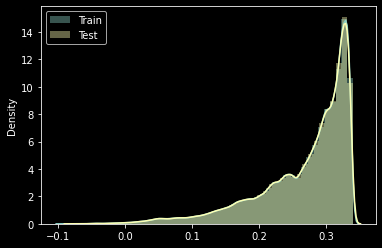

In [ ]:
# ▶ 분포 시각화를 통해 Threshold 조정 (Train set/ Test set)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])


sns.distplot( clf.decision_function(x_train), label='Train');
sns.distplot( clf.decision_function(x_test), label="Test");
plt.legend();

### · Classification model 기반 A.D
---

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
pred_lr = lr.predict(x_train)
print(classification_report(y_train,pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448085
           1       0.35      0.42      0.38      5749

    accuracy                           1.00   4453834
   macro avg       0.67      0.71      0.69   4453834
weighted avg       1.00      1.00      1.00   4453834



In [ ]:
pd.Series(pred_lr).value_counts()

0    4446854
1       6980
dtype: int64

In [ ]:
pred_lr = lr.predict(x_test)
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.36      0.44      0.40      2464

    accuracy                           1.00   1908786
   macro avg       0.68      0.72      0.70   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
pd.Series(pred_lr).value_counts()

0    1905788
1       2998
dtype: int64